# Problem: Predicting residential utility costs based on attributes of the house. 

## Modeling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "data/cleaned.csv"

In [ ]:
url = "https://raw.githubusercontent.com/JuliaZozulia/Predicting_utilitiy_cost/master/data/cleaned.csv"

In [182]:
df = pd.read_csv(url, index_col=0)
df[df.select_dtypes(["object"]).columns] = df.select_dtypes(["object"]).apply(
    lambda x: x.astype("category")
)

In [4]:
X = df.drop(columns='total_usage')
y = df['total_usage']

In [5]:
def plot_validation_curve(train_scores, test_scores, param_name):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve with SVM")
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(
        param_range,
        train_scores_mean,
        label="Training score",
        color="darkorange",
        lw=lw,
    )
    plt.fill_between(
        param_range,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.2,
        color="darkorange",
        lw=lw,
    )
    plt.plot(
        param_range,
        test_scores_mean,
        label="Cross-validation score",
        color="navy",
        lw=lw,
    )
    plt.fill_between(
        param_range,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.2,
        color="navy",
        lw=lw,
    )
    plt.legend(loc="best")
    plt.show()

### StandardScaler, OneHotEncoder

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [151]:
def preprocess(df):
    numeric_features = df.select_dtypes(exclude=["category"]).columns
    numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

    preprocessor = ColumnTransformer(
        transformers=[("num", numeric_transformer, numeric_features)]
    )
    df.loc[:, numeric_features] = preprocessor.fit_transform(df)

    categorical_features = df.select_dtypes(include=["category"]).columns
    df = pd.get_dummies(
        df, columns=categorical_features, drop_first=True, dummy_na=False
    )

    X = df.drop(columns="total_usage")
    y = df["total_usage"]
    return X, y

In [183]:
X, y = preprocess(df)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Linear Regression

In [213]:
from sklearn.linear_model import ElasticNetCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = ElasticNetCV(cv=5,  max_iter=10000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7197383233191155

In [214]:
model.alpha_

0.0031497671742552144

In [215]:
len((model.coef_[model.coef_>0]))

138

In [217]:
from sklearn.metrics import mean_squared_error



# SVM

In [66]:
from sklearn.svm import SVR

In [48]:
from sklearn.svm import SVR

parameters = {"kernel": ["rbf"], "C": [1, 5, 10]}  
model = SVR(gamma="auto")
gm_cv = GridSearchCV(model, parameters, cv=5, n_jobs=8)

gm_cv.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto', kernel='rbf', max_iter=-1,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=8,
             param_grid={'C': [1, 5, 10], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [49]:
gm_cv.best_score_ 

0.711286708037147

In [50]:
gm_cv.best_params_

{'C': 5, 'kernel': 'rbf'}

In [ ]:
from sklearn.model_selection import validation_curve

param_range = [1, 5, 10, 20]
train_scores, test_scores = validation_curve(
    SVR(kernel="rbf"),
    X,
    y,
    param_name="C",
    param_range=param_range,
    cv=5,
    n_jobs=8,
)

plot_validation_curve (train_scores, test_scores, 'C')

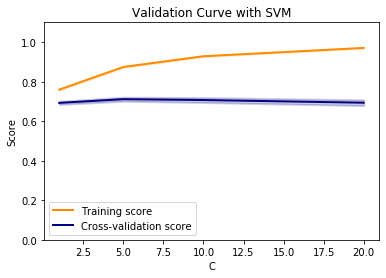

In [74]:
plot_validation_curve (train_scores, test_scores, 'C')

# Neural network

In [60]:
from sklearn.neural_network import MLPRegressor

parameters = {
    "hidden_layer_sizes": [(128, 128, 16)],
    "activation": ["tanh", "relu", "logistic"],
    "solver": ["sgd", "adam"],
    "alpha": [0, 0.0001],
    "max_iter": [5000],
    "learning_rate_init": [0.001, 0.01],
    "learning_rate": ["adaptive"],
}
model = MLPRegressor(early_stopping=True, validation_fraction=0.2)
gm_cv = GridSearchCV(model, parameters, cv=5, n_jobs=8)

gm_cv.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=True, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_iter=200,
                                    momentum=0.9, n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state...
                                    validation_fraction=0.2, verbose=False,
                                    warm_start=False),
             iid='warn', n_jobs=8,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0, 0.0001],
                         'hidden_layer_sizes':

In [62]:
gm_cv.best_score_ 

0.7043097195425266

In [63]:
gm_cv.best_params_

{'activation': 'logistic',
 'alpha': 0.0001,
 'hidden_layer_sizes': (128, 128, 16),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.01,
 'max_iter': 5000,
 'solver': 'sgd'}

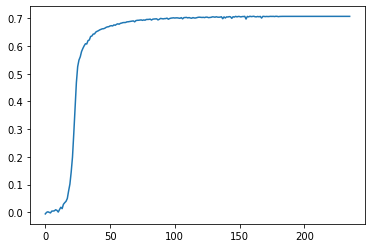

In [65]:
plt.plot(gm_cv.best_estimator_.validation_scores_)

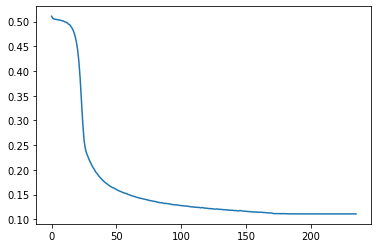

In [66]:
plt.plot(gm_cv.best_estimator_.loss_curve_)

# LightGBM (gradient boosting) 

### 1. LightGBM with standart scaller and one-hot encoding

In [186]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import r2_score

import lightgbm as lgb

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

plt.style.use("seaborn")
sns.set(font_scale=1)

In [187]:
lgb_params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": "rmse",
    #'max_depth': 8,
    "num_leaves": 20,
    "bagging_fraction": 0.2,
    "feature_fraction": 0.2,
    "learning_rate": 0.001,
    "verbose": 1,
    "lambda_l2": 2,
}

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

trn_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_test, label=y_test)


evals_result = {}

model = None
model = lgb.train(
    lgb_params,
    trn_data,
    100000,
    valid_sets=[trn_data, val_data],
    early_stopping_rounds=3000,
    verbose_eval=2000,
    evals_result=evals_result,
)

Training until validation scores don't improve for 3000 rounds.
[2000]	training's rmse: 0.574742	valid_1's rmse: 0.630126
[4000]	training's rmse: 0.47722	valid_1's rmse: 0.570249
[6000]	training's rmse: 0.429223	valid_1's rmse: 0.55118
[8000]	training's rmse: 0.395943	valid_1's rmse: 0.542846
[10000]	training's rmse: 0.369555	valid_1's rmse: 0.538422
[12000]	training's rmse: 0.347808	valid_1's rmse: 0.535674
[14000]	training's rmse: 0.329183	valid_1's rmse: 0.534059
[16000]	training's rmse: 0.312672	valid_1's rmse: 0.532771
[18000]	training's rmse: 0.297969	valid_1's rmse: 0.531851
[20000]	training's rmse: 0.28468	valid_1's rmse: 0.531058
[22000]	training's rmse: 0.272639	valid_1's rmse: 0.530393
[24000]	training's rmse: 0.261442	valid_1's rmse: 0.529936
[26000]	training's rmse: 0.251128	valid_1's rmse: 0.52953
[28000]	training's rmse: 0.241118	valid_1's rmse: 0.529161
[30000]	training's rmse: 0.231771	valid_1's rmse: 0.528953
[32000]	training's rmse: 0.223046	valid_1's rmse: 0.528687


In [189]:
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.7224068455321058

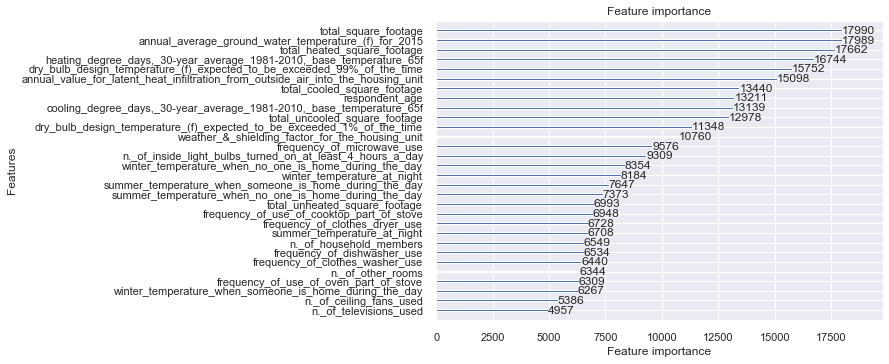

In [190]:
lgb.plot_importance(model, max_num_features = 30)
plt.show()

### 2. LightGBM without one-hot encoding

According to  LightGBM documentation, it is common to represent categorical features with one-hot encoding, but this approach is suboptimal for tree learners. Particularly for high-cardinality categorical features, a tree built on one-hot features tends to be unbalanced and needs to grow very deep to achieve good accuracy.
Let's try to let  LightGBM to deal with categorical values on it's own to see it this will lead to better performance.

In [149]:
original = pd.read_csv(url, index_col=0)
original[original.select_dtypes(["object"]).columns] = original.select_dtypes(["object"]).apply(
    lambda x: x.astype("category")
)

X_original = original.drop(columns='total_usage')
y_original = original['total_usage']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X_original, y_original, test_size=0.2
)

trn_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_test, label=y_test)


evals_result = {}

model_original = None
model_original = lgb.train(
    lgb_params,
    trn_data,
    100000,
    valid_sets=[trn_data, val_data],
    early_stopping_rounds=3000,
    verbose_eval=2000,
    evals_result=evals_result,
)

Training until validation scores don't improve for 3000 rounds.
[2000]	training's rmse: 26527.7	valid_1's rmse: 29503.3
[4000]	training's rmse: 22014.4	valid_1's rmse: 26394.5
[6000]	training's rmse: 19801.8	valid_1's rmse: 25454.5
[8000]	training's rmse: 18222.8	valid_1's rmse: 24992.3
[10000]	training's rmse: 16970.9	valid_1's rmse: 24743.5
[12000]	training's rmse: 15945.2	valid_1's rmse: 24590.9
[14000]	training's rmse: 15065.4	valid_1's rmse: 24498.7
[16000]	training's rmse: 14301.2	valid_1's rmse: 24433.6
[18000]	training's rmse: 13616.7	valid_1's rmse: 24384.9
[20000]	training's rmse: 12989.2	valid_1's rmse: 24349.1
[22000]	training's rmse: 12414.1	valid_1's rmse: 24321.1
[24000]	training's rmse: 11879.1	valid_1's rmse: 24293.6
[26000]	training's rmse: 11377.8	valid_1's rmse: 24270.8
[28000]	training's rmse: 10902.7	valid_1's rmse: 24246.2
[30000]	training's rmse: 10463.1	valid_1's rmse: 24228.4
[32000]	training's rmse: 10035.6	valid_1's rmse: 24211.9
[34000]	training's rmse: 963

In [81]:
y_pred = model_original.predict(X_test)
r2_score(y_test, y_pred)

0.7552252569855717

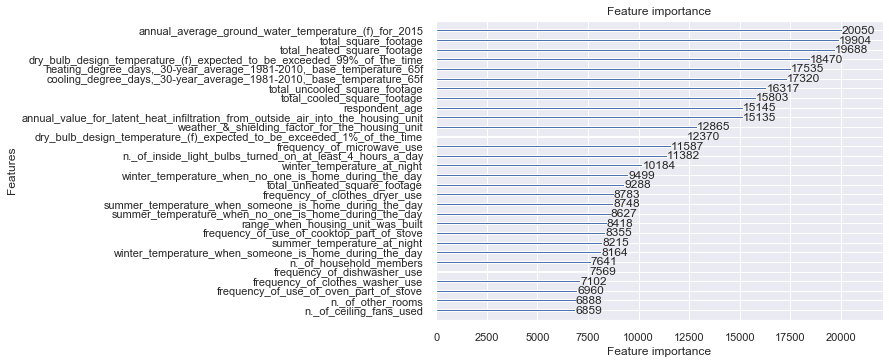

In [82]:
lgb.plot_importance(model_original, max_num_features = 30)
plt.show()

## Using subset of variables

### Choosing subset based on tree feature importance

In [191]:
top_features = pd.DataFrame(
    {
        "feature_name": model.feature_name(),
        "importance": model.feature_importance(),
    },
)

In [192]:
top_features.sort_values(by = 'importance', ascending = False, inplace = True)

In [195]:
top_features.iloc[:10]

,feature_name,importance
59,total_square_footage,17990
66,annual_average_ground_water_temperature_(f)_fo...,17989
58,total_heated_square_footage,17662
63,"heating_degree_days,_30-year_average_1981-2010...",16744
68,dry_bulb_design_temperature_(f)_expected_to_be...,15752
65,annual_value_for_latent_heat_infiltration_from...,15098
57,total_cooled_square_footage,13440
50,respondent_age,13211
62,"cooling_degree_days,_30-year_average_1981-2010...",13139
60,total_uncooled_square_footage,12978


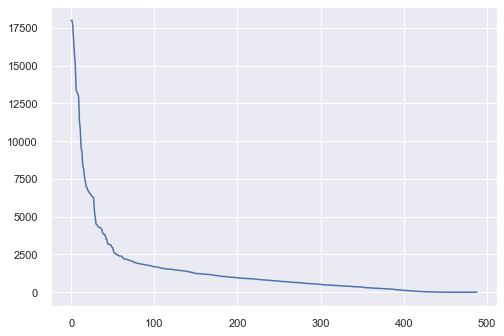

In [194]:
plt.plot(np.arange(len(top_features)), top_features["importance"])

#### SVR: top 100 (tree-based)

In [203]:
X_top = X.iloc[:,top_features.iloc[:100].index]

parameters = {"kernel": ["rbf"], "C": [5]}
model = SVR(gamma="auto")
gm_cv = GridSearchCV(model, parameters, cv=5, n_jobs=8)

gm_cv.fit(X_top, y)

gm_cv.best_score_ 

0.6543471128187528

#### SVR: top 200 (tree-based)

In [199]:
X_top = X.iloc[:,top_features.iloc[:200].index]

parameters = {"kernel": ["rbf"], "C": [5]}
model = SVR(gamma="auto")
gm_cv = GridSearchCV(model, parameters, cv=5, n_jobs=8)

gm_cv.fit(X_top, y)

gm_cv.best_score_ 

0.6915363757548512

#### SVR: top 300 (tree-based)

In [200]:
X_top = X.iloc[:,top_features.iloc[:300].index]

parameters = {"kernel": ["rbf"], "C": [5]}
model = SVR(gamma="auto")
gm_cv = GridSearchCV(model, parameters, cv=5, n_jobs=8)

gm_cv.fit(X_top, y)

gm_cv.best_score_ 

0.7057417071614239

#### SVR: top 400 (tree-based)

In [201]:
X_top = X.iloc[:,top_features.iloc[:400].index]

parameters = {"kernel": ["rbf"], "C": [5]}
model = SVR(gamma="auto")
gm_cv = GridSearchCV(model, parameters, cv=5, n_jobs=8)

gm_cv.fit(X_top, y)

gm_cv.best_score_ 

0.7096598553717093

#### SVR: all variables

In [202]:
parameters = {"kernel": ["rbf"], "C": [5]}
model = SVR(gamma="auto")
gm_cv = GridSearchCV(model, parameters, cv=5, n_jobs=8)

gm_cv.fit(X, y)

gm_cv.best_score_ 

0.711286708037147

### Choosing subset based on SelectKBest

In [204]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

X_k_best = SelectKBest(mutual_info_regression, k=300).fit_transform(X, y)

#### SVR: top 100 (tree-based)

In [206]:
X_k_best = SelectKBest(mutual_info_regression, k=100).fit_transform(X, y)

parameters = {"kernel": ["rbf"], "C": [5]}
model = SVR(gamma="auto")
gm_cv = GridSearchCV(model, parameters, cv=5, n_jobs=8)

gm_cv.fit(X_k_best, y)

gm_cv.best_score_ 

0.6463750483527736

#### SVR: top 300 (tree-based)

In [205]:
X_k_best = SelectKBest(mutual_info_regression, k=300).fit_transform(X, y)

parameters = {"kernel": ["rbf"], "C": [5]}
model = SVR(gamma="auto")
gm_cv = GridSearchCV(model, parameters, cv=5, n_jobs=8)

gm_cv.fit(X_k_best, y)

gm_cv.best_score_ 

0.7032347578405826

Tree based feature importance gives better result. 

## NN
#### SVR: top 200 (tree-based)

In [218]:
X_top = X.iloc[:,top_features.iloc[:200].index]

parameters = {
    "hidden_layer_sizes": [(128, 128, 16)],
    "activation": ["logistic"],
    "solver": ["sgd"],
    "alpha": [0.0001],
    "max_iter": [5000],
    "learning_rate_init": [0.01],
    "learning_rate": ["adaptive"],
}
model = MLPRegressor(early_stopping=True, validation_fraction=0.2)
gm_cv = GridSearchCV(model, parameters, cv=5, n_jobs=8)

gm_cv.fit(X_top, y)

gm_cv.best_score_ 

0.7018098846869211

#### SVR: top 200 (SelectKBest)

In [220]:
X_k_best = SelectKBest(mutual_info_regression, k=200).fit_transform(X, y)

parameters = {
    "hidden_layer_sizes": [(128, 128, 16)],
    "activation": ["logistic"],
    "solver": ["sgd"],
    "alpha": [0.0001],
    "max_iter": [5000],
    "learning_rate_init": [0.01],
    "learning_rate": ["adaptive"],
}
model = MLPRegressor(early_stopping=True, validation_fraction=0.2)
gm_cv = GridSearchCV(model, parameters, cv=5, n_jobs=8)

gm_cv.fit(X_k_best, y)

gm_cv.best_score_

0.6864530720942508

# Results
The best overall model (all 254 variables ):  **LightGBM** without one-hot encoding (**$R^2$ 0.76 validation score**)

The best model on subset of variables (138 out of 489 one-hot encoded variables):  **ElasticNet** (**$R^2$ 0.72 validation score**)